In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing

In [35]:
original = pd.read_csv("../datas/life_expectancy_data_4.29.csv")

In [36]:
original.columns = [cols.upper() for cols in original.columns.tolist()]
original.head()

,COUNTRYCODE,ISO3166,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,AFG,4,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,1.990711e+10,34413603,17.2,17.3,0.479,10.1
1,AFG,4,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,2.048489e+10,33370794,17.5,17.5,0.476,10.0
2,AFG,4,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,2.056107e+10,32269589,17.7,17.7,0.470,9.9
3,AFG,4,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,2.000160e+10,31161376,17.9,18.0,0.463,9.8
4,AFG,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,1.780429e+10,30117413,18.2,18.2,0.454,9.5


In [37]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRYCODE                      2936 non-null   object 
 1   ISO3166                          2936 non-null   int64  
 2   COUNTRY                          2936 non-null   object 
 3   YEAR                             2936 non-null   int64  
 4   STATUS                           2936 non-null   object 
 5   LIFE_EXPECTANCY                  2928 non-null   float64
 6   ADULT_MORTALITY                  2928 non-null   float64
 7   INFANT_DEATHS                    2936 non-null   int64  
 8   ALCOHOL                          2742 non-null   float64
 9   PERCENTAGE_EXPENDITURE           2936 non-null   float64
 10  HEPATITIS_B                      2383 non-null   float64
 11  MEASLES                          2936 non-null   int64  
 12  BMI                 

In [38]:
# Developing: 0, developed: 1
original["STATUS"] = [row.replace("Developing","0") for row in original["STATUS"].tolist()]
original["STATUS"] = [row.replace("Developed","1") for row in original["STATUS"].tolist()]
original["STATUS"] = [int(row) for row in original["STATUS"].tolist()]

In [39]:
original.head()

,COUNTRYCODE,ISO3166,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,AFG,4,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,1.990711e+10,34413603,17.2,17.3,0.479,10.1
1,AFG,4,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,2.048489e+10,33370794,17.5,17.5,0.476,10.0
2,AFG,4,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,2.056107e+10,32269589,17.7,17.7,0.470,9.9
3,AFG,4,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,2.000160e+10,31161376,17.9,18.0,0.463,9.8
4,AFG,4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,1.780429e+10,30117413,18.2,18.2,0.454,9.5


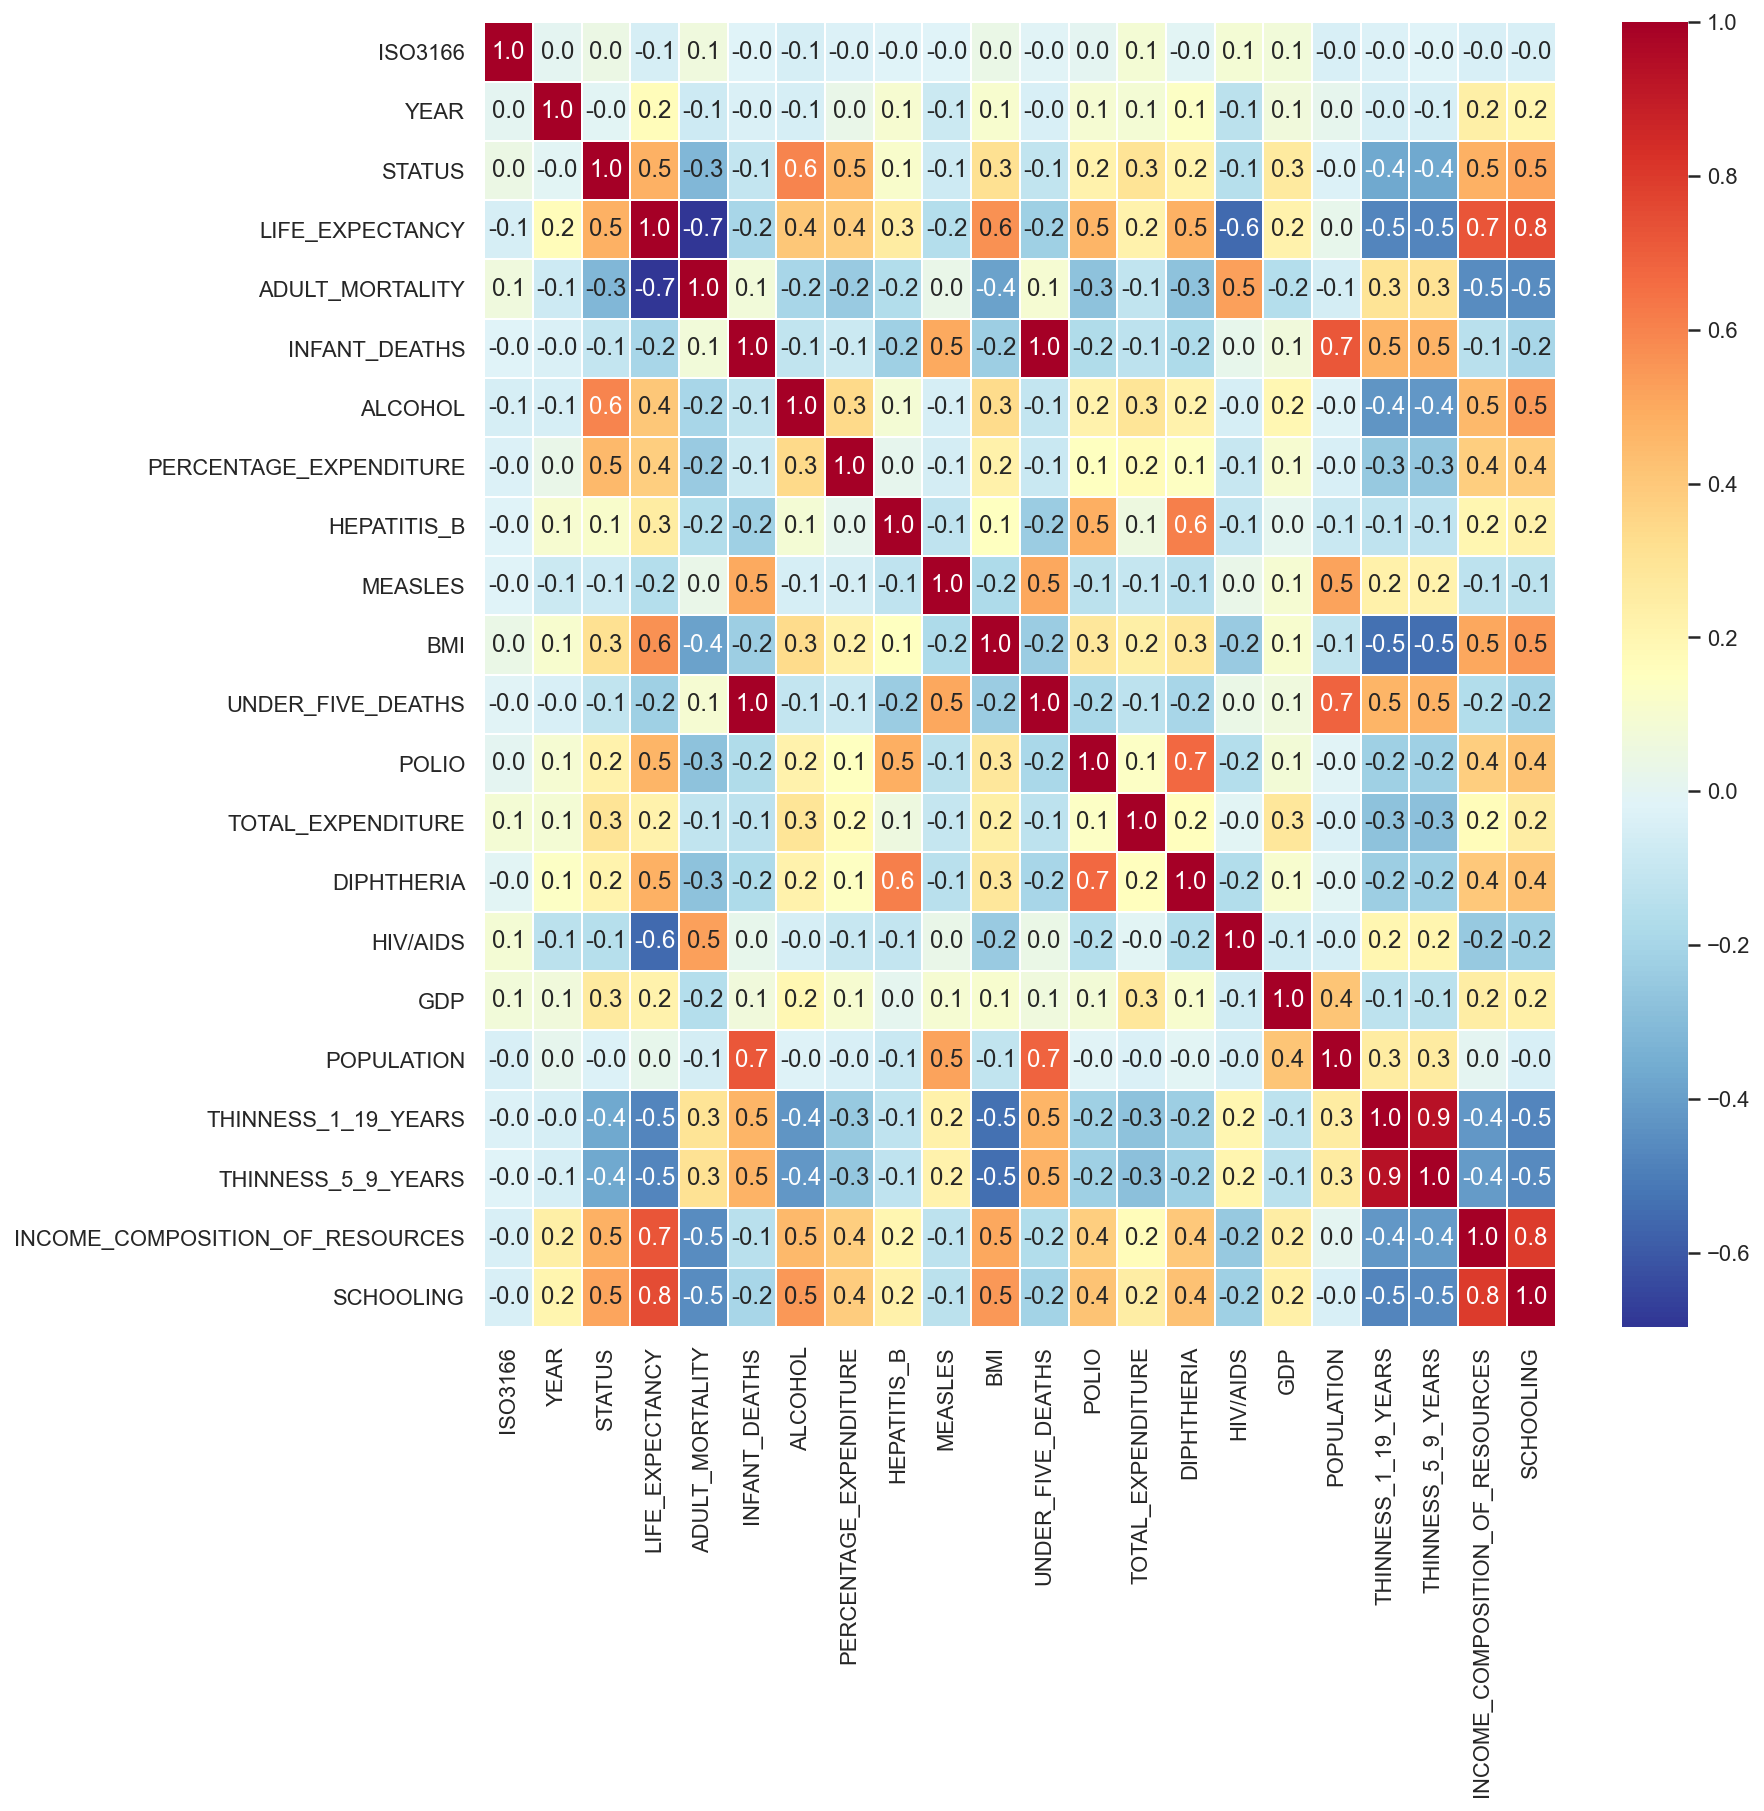

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(original.corr(), annot=True, fmt='.1f', linewidths=0.5, cmap='RdYlBu_r');

In [53]:
# 연도별로 groupby
year_data = original.groupby("YEAR").mean()
# ISO3166 컬럼 제외
year_data = year_data[year_data.columns.tolist()[1:]]
year_data

,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
YEAR,,,,,,,,,,,,,,,,,,,,
2000,0.174863,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,1.861460e+11,3.319482e+07,5.147514,5.244751,0.512214,10.512717
2001,0.174863,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,5.599609,76.661111,2.573770,1.841612e+11,3.362655e+07,4.957459,5.055249,0.563012,10.950289
2002,0.174863,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,5.687989,78.883978,2.573770,1.902463e+11,3.405723e+07,5.166298,5.118232,0.568006,11.140462
2003,0.174863,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,5.827444,78.867403,2.546995,2.137869e+11,3.448852e+07,4.924309,5.023757,0.572399,11.308092
2004,0.174863,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,5.859111,79.823204,2.478689,2.398338e+11,3.492245e+07,4.936464,5.029282,0.584168,11.547399
2005,0.174863,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,5.920722,81.674033,2.345902,2.598367e+11,3.535945e+07,5.099448,5.195580,0.596445,11.675723
2006,0.174863,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,84.527473,5.699000,82.236264,2.169399,2.817598e+11,3.580062e+07,5.115470,5.157459,0.632312,11.917919
2007,0.174863,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,84.802198,5.631056,84.318681,1.992896,3.177150e+11,3.624442e+07,5.034807,4.976243,0.639000,12.038150
2008,0.174863,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,85.565934,5.723056,84.857143,1.797268,3.487197e+11,3.669504e+07,4.907182,4.941436,0.645717,12.176301


In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [26]:
year_data.columns

Index(['LIFE_EXPECTANCY', 'ADULT_MORTALITY', 'INFANT_DEATHS', 'ALCOHOL',
       'PERCENTAGE_EXPENDITURE', 'HEPATITIS_B', 'MEASLES', 'BMI',
       'UNDER_FIVE_DEATHS', 'POLIO', 'TOTAL_EXPENDITURE', 'DIPHTHERIA',
       'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS_1_19_YEARS',
       'THINNESS_5_9_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING'],
      dtype='object')

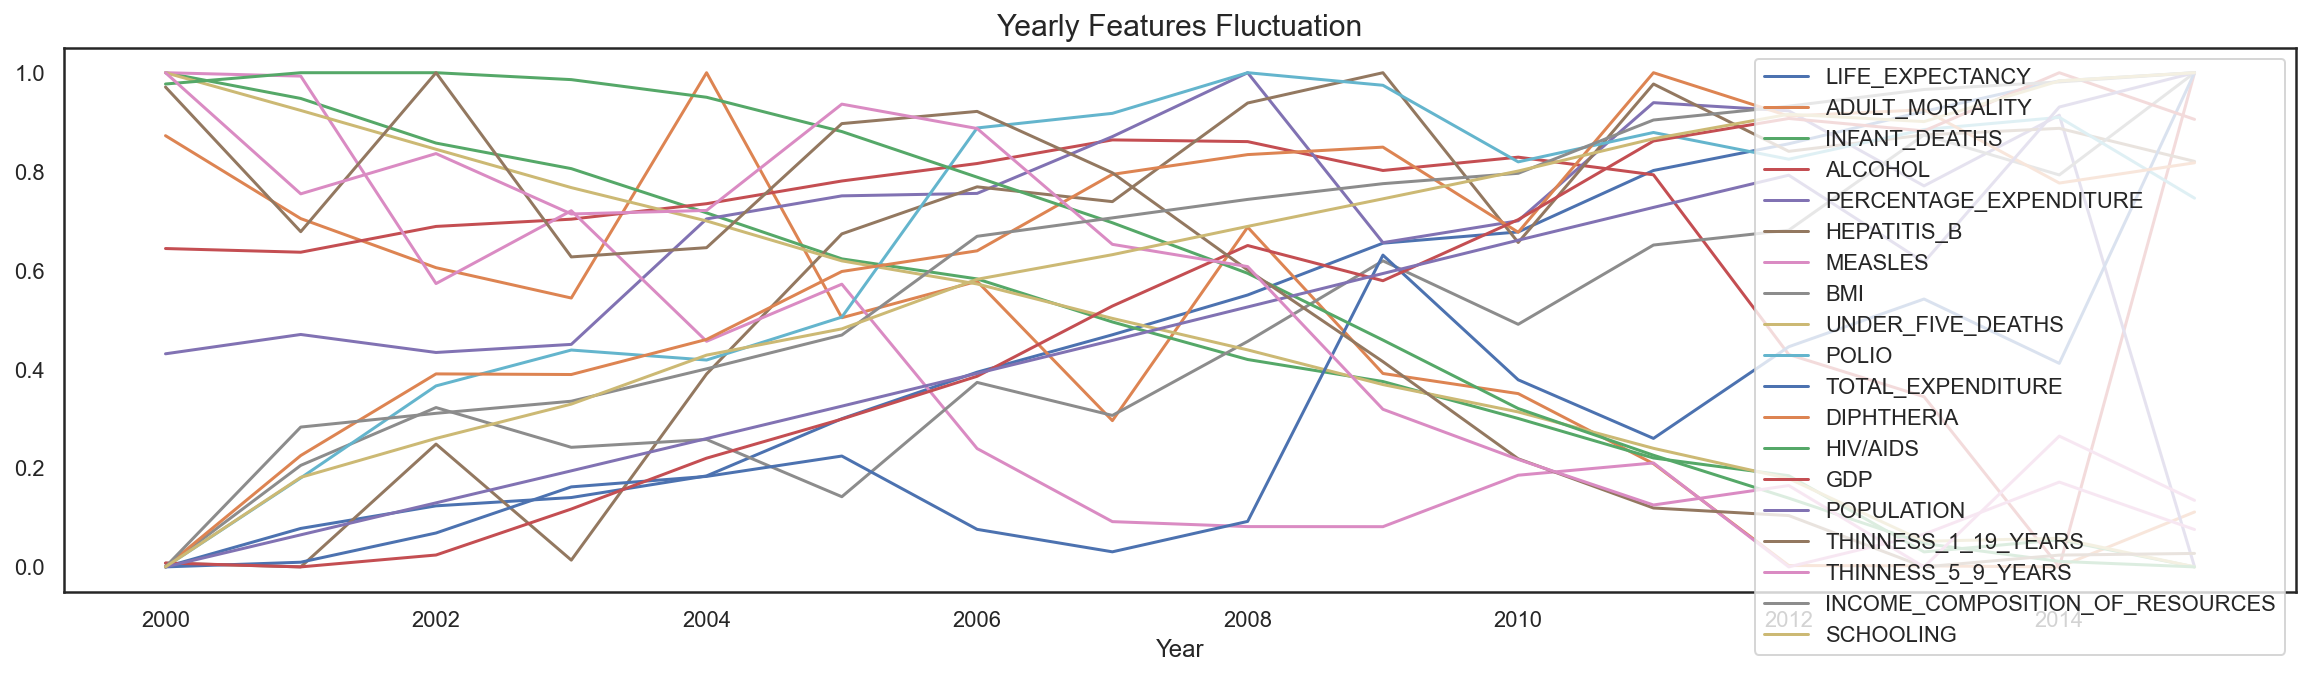

In [12]:
plt.figure(figsize=(20, 5))
plt.title("Yearly Features Fluctuation", fontsize= 15)
for a in year_data.columns.tolist():
    plt.plot(year_data.index, preprocessing.minmax_scale(year_data[a]), label=a)
    
plt.xlabel("Year")
plt.legend()
plt.show()

In [43]:
# mix-max scaling
scaled_year_data = pd.DataFrame(preprocessing.minmax_scale(year_data))
scaled_year_data.index = year_data.index
scaled_year_data.columns = year_data.columns.tolist()
scaled_year_data

,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
YEAR,,,,,,,,,,,,,,,,,,,,
2000,1.0,0.000000,0.872600,1.000000,0.644217,0.431186,0.007501,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.977149,0.007844,0.000000,0.971064,1.000000,0.000000,0.000000
2001,1.0,0.077813,0.704770,0.947892,0.636753,0.470307,0.000000,0.993119,0.205426,0.923647,0.180038,0.009457,0.225365,1.000000,0.000000,0.064876,0.678305,0.754877,0.282954,0.181231
2002,1.0,0.123512,0.605439,0.857597,0.688947,0.433878,0.248491,0.573307,0.322433,0.845070,0.366249,0.068593,0.390515,1.000000,0.024048,0.129592,1.000000,0.836347,0.310773,0.259995
2003,1.0,0.140355,0.544066,0.805887,0.703602,0.450260,0.013697,0.720712,0.241974,0.767482,0.438818,0.161904,0.389284,0.986004,0.117079,0.194400,0.627243,0.714143,0.335244,0.329423
2004,1.0,0.184146,1.000000,0.716388,0.734929,0.704170,0.390302,0.456545,0.257827,0.700025,0.418594,0.183092,0.460296,0.950300,0.220014,0.259606,0.645966,0.721289,0.400799,0.428537
2005,1.0,0.299798,0.504218,0.623309,0.780902,0.750796,0.673857,0.572078,0.142014,0.619224,0.505439,0.224317,0.597806,0.880891,0.299065,0.325273,0.897024,0.936397,0.469187,0.481685
2006,1.0,0.394004,0.577952,0.582737,0.816243,0.755788,0.769065,0.239469,0.373309,0.572523,0.888195,0.075961,0.639577,0.788632,0.385703,0.391566,0.921704,0.887086,0.668974,0.581997
2007,1.0,0.469683,0.295957,0.495625,0.864023,0.870732,0.739108,0.091583,0.306514,0.502842,0.917773,0.030498,0.794293,0.696372,0.527796,0.458253,0.797451,0.652683,0.706227,0.631793
2008,1.0,0.550191,0.687464,0.419650,0.860564,1.000000,0.938664,0.081548,0.456288,0.439091,1.000000,0.092056,0.834298,0.594116,0.650324,0.525968,0.600860,0.607661,0.743641,0.689011


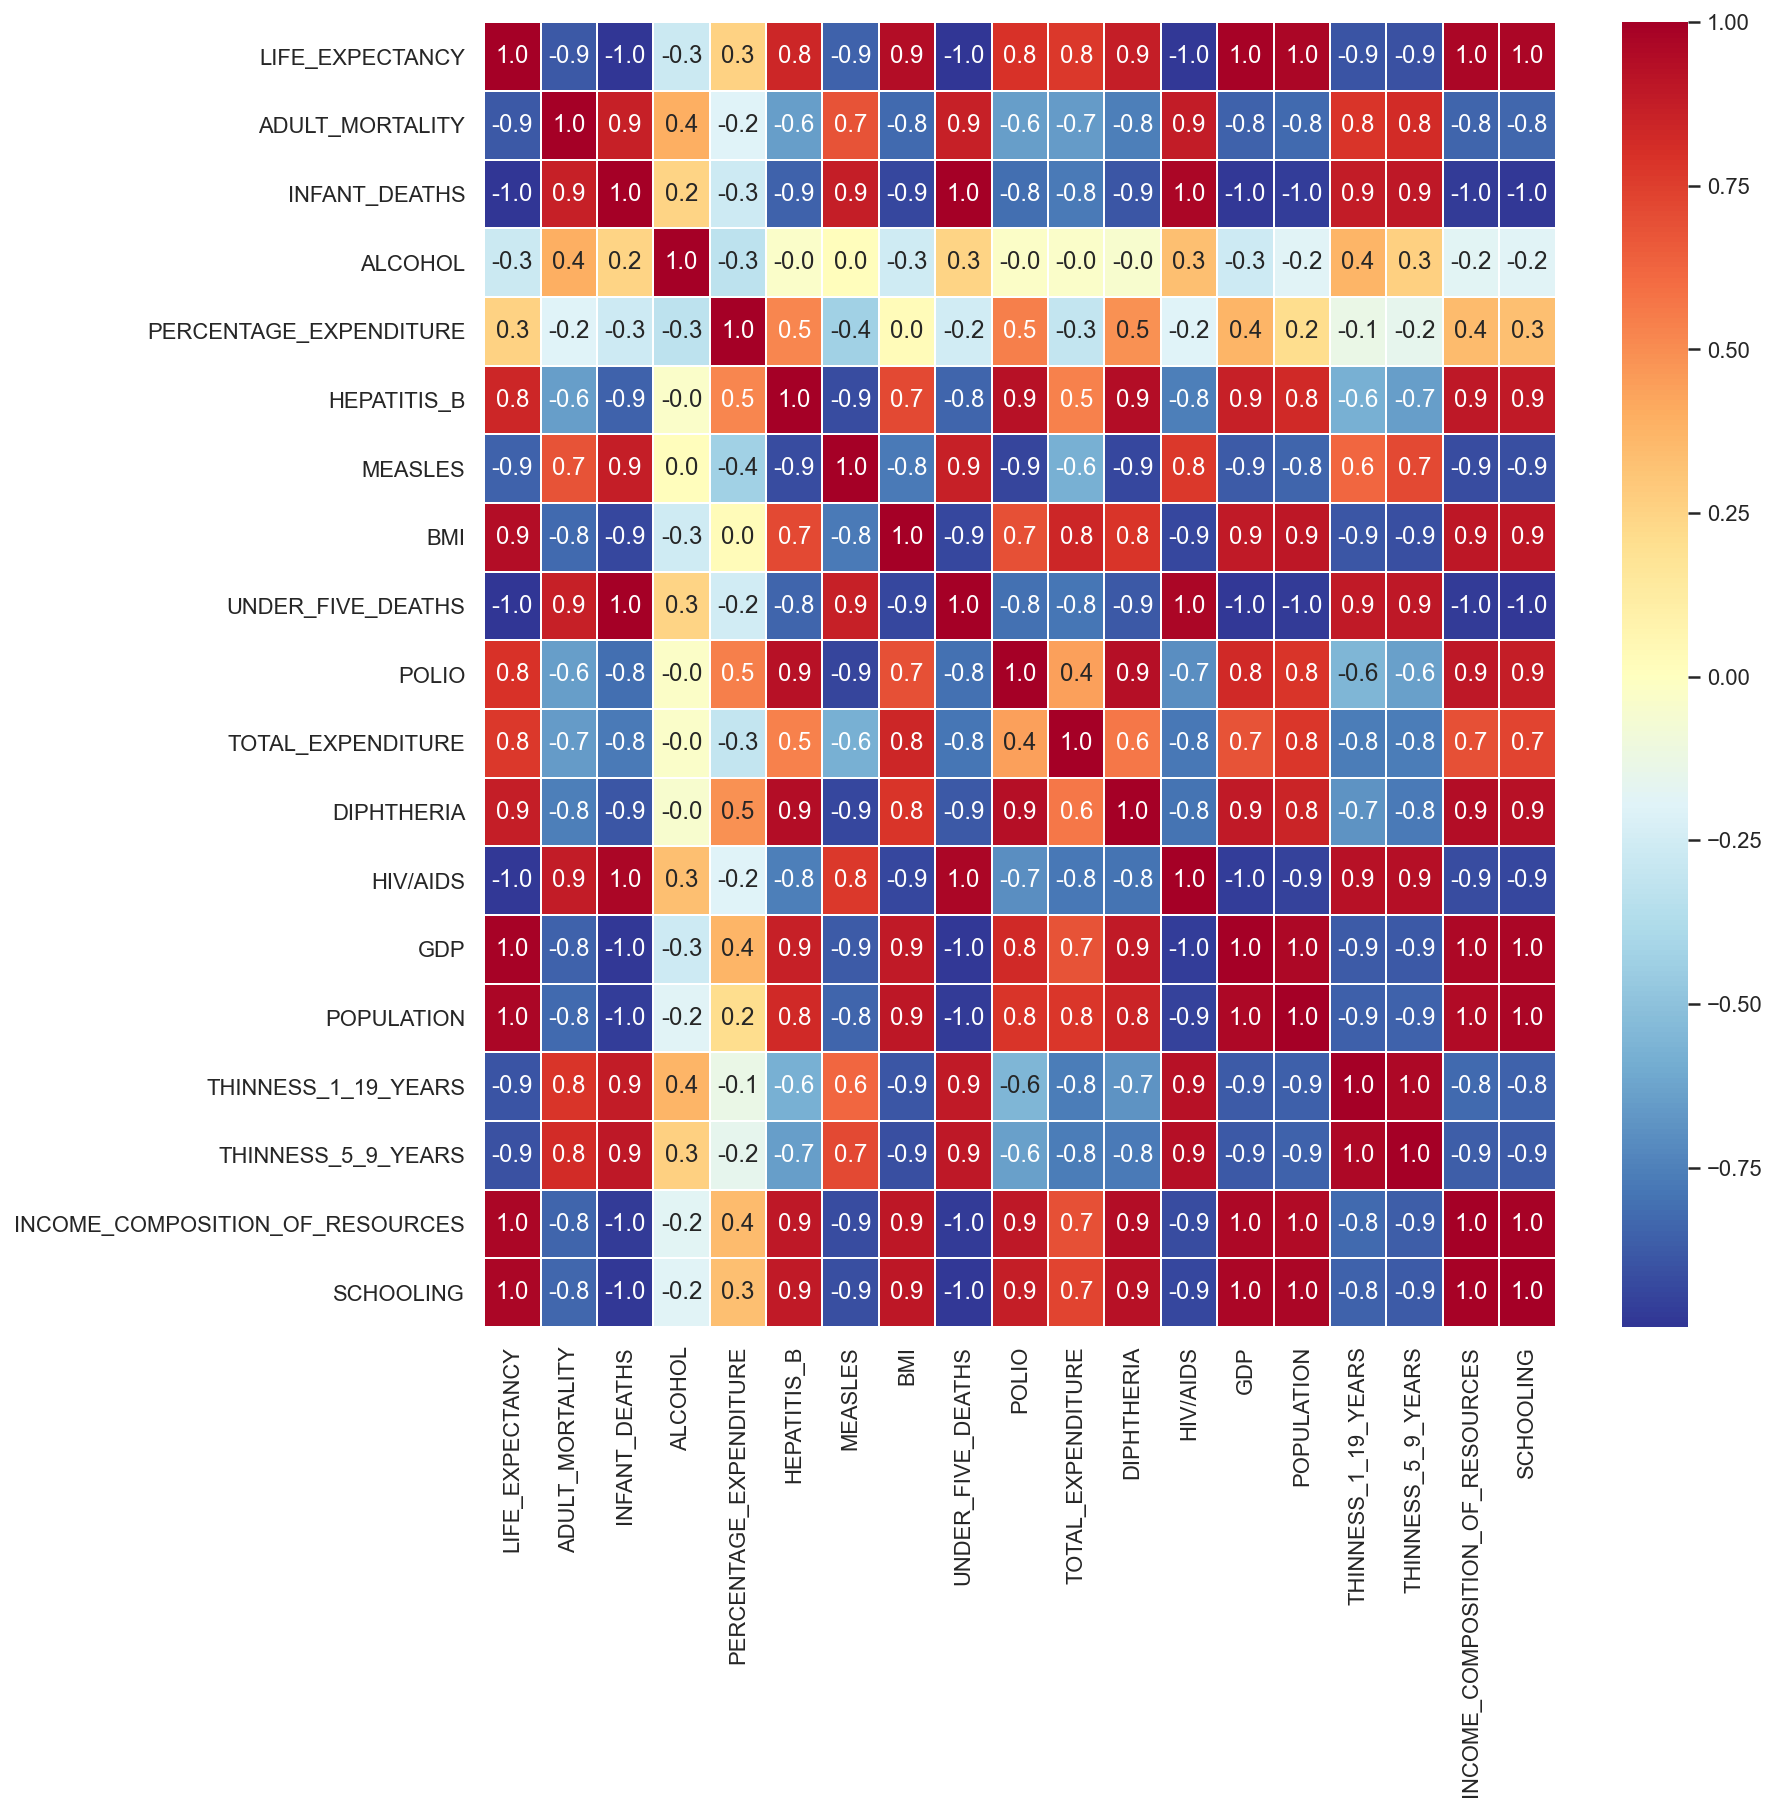

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(scaled_year_data.corr(), annot=True, fmt='.1f', linewidths=0.5, cmap='RdYlBu_r');

In [51]:
# 대분류 카테고리별
dict = {'economy': ['PERCENTAGE_EXPENDITURE', 'TOTAL_EXPENDITURE', 'GDP', 'POPULATION'],
        'death_rate': ['INFANT_DEATHS', "ADULT_MORTALITY",'UNDER_FIVE_DEATHS','THINNESS_1_19_YEARS','THINNESS_5_9_YEARS', 'HIV/AIDS'],
        'vaccine': ['HEPATITIS_B','MEASLES','POLIO','DIPHTHERIA'],
        'others':['SCHOOLING','INCOME_COMPOSITION_OF_RESOURCES', 'BMI', 'ALCOHOL']}

In [52]:
# percentage_expenditure 2015년 데이터 확인이 필요해보인다
# expenditure 수치들을 어떻게 봐야할지 고민이다......
px.line(scaled_year_data[dict['economy']])

In [48]:
# 사망률/유병률이 모두 좌하향의 모습을 보인다
# 성인 치명률은 2004년과 2008년에 급 상승하는데 혹시 전염병이 있었던게 아닌지 확인해볼 필요가 있다.
# 대충 찾아보니 2004년 사스 / 2008 신종플루 유행 시즌과 겹치네요!
# 혹시 2009년에 total expenditure가 올라간게 전세계적으로 유행병에 대응하느라 비용이 올라간게 아닐지??
px.line(scaled_year_data[dict['death_rate']])

In [49]:
px.line(scaled_year_data[dict['vaccine']])
# MEASLES의 경우, 백신 접종율인 다른 feature와 다르게 걸린 사람 수여서 좌하향이다.

In [50]:
# 알콜 14, 15년 데이터가 이상한 것 같아 확인해볼 필요가 있다.
# 알콜은 확실히 상승/하락하는 수치라기보다 비슷하게 유지되는 경향이 있을 것 같다.
px.line(scaled_year_data[dict['others']])

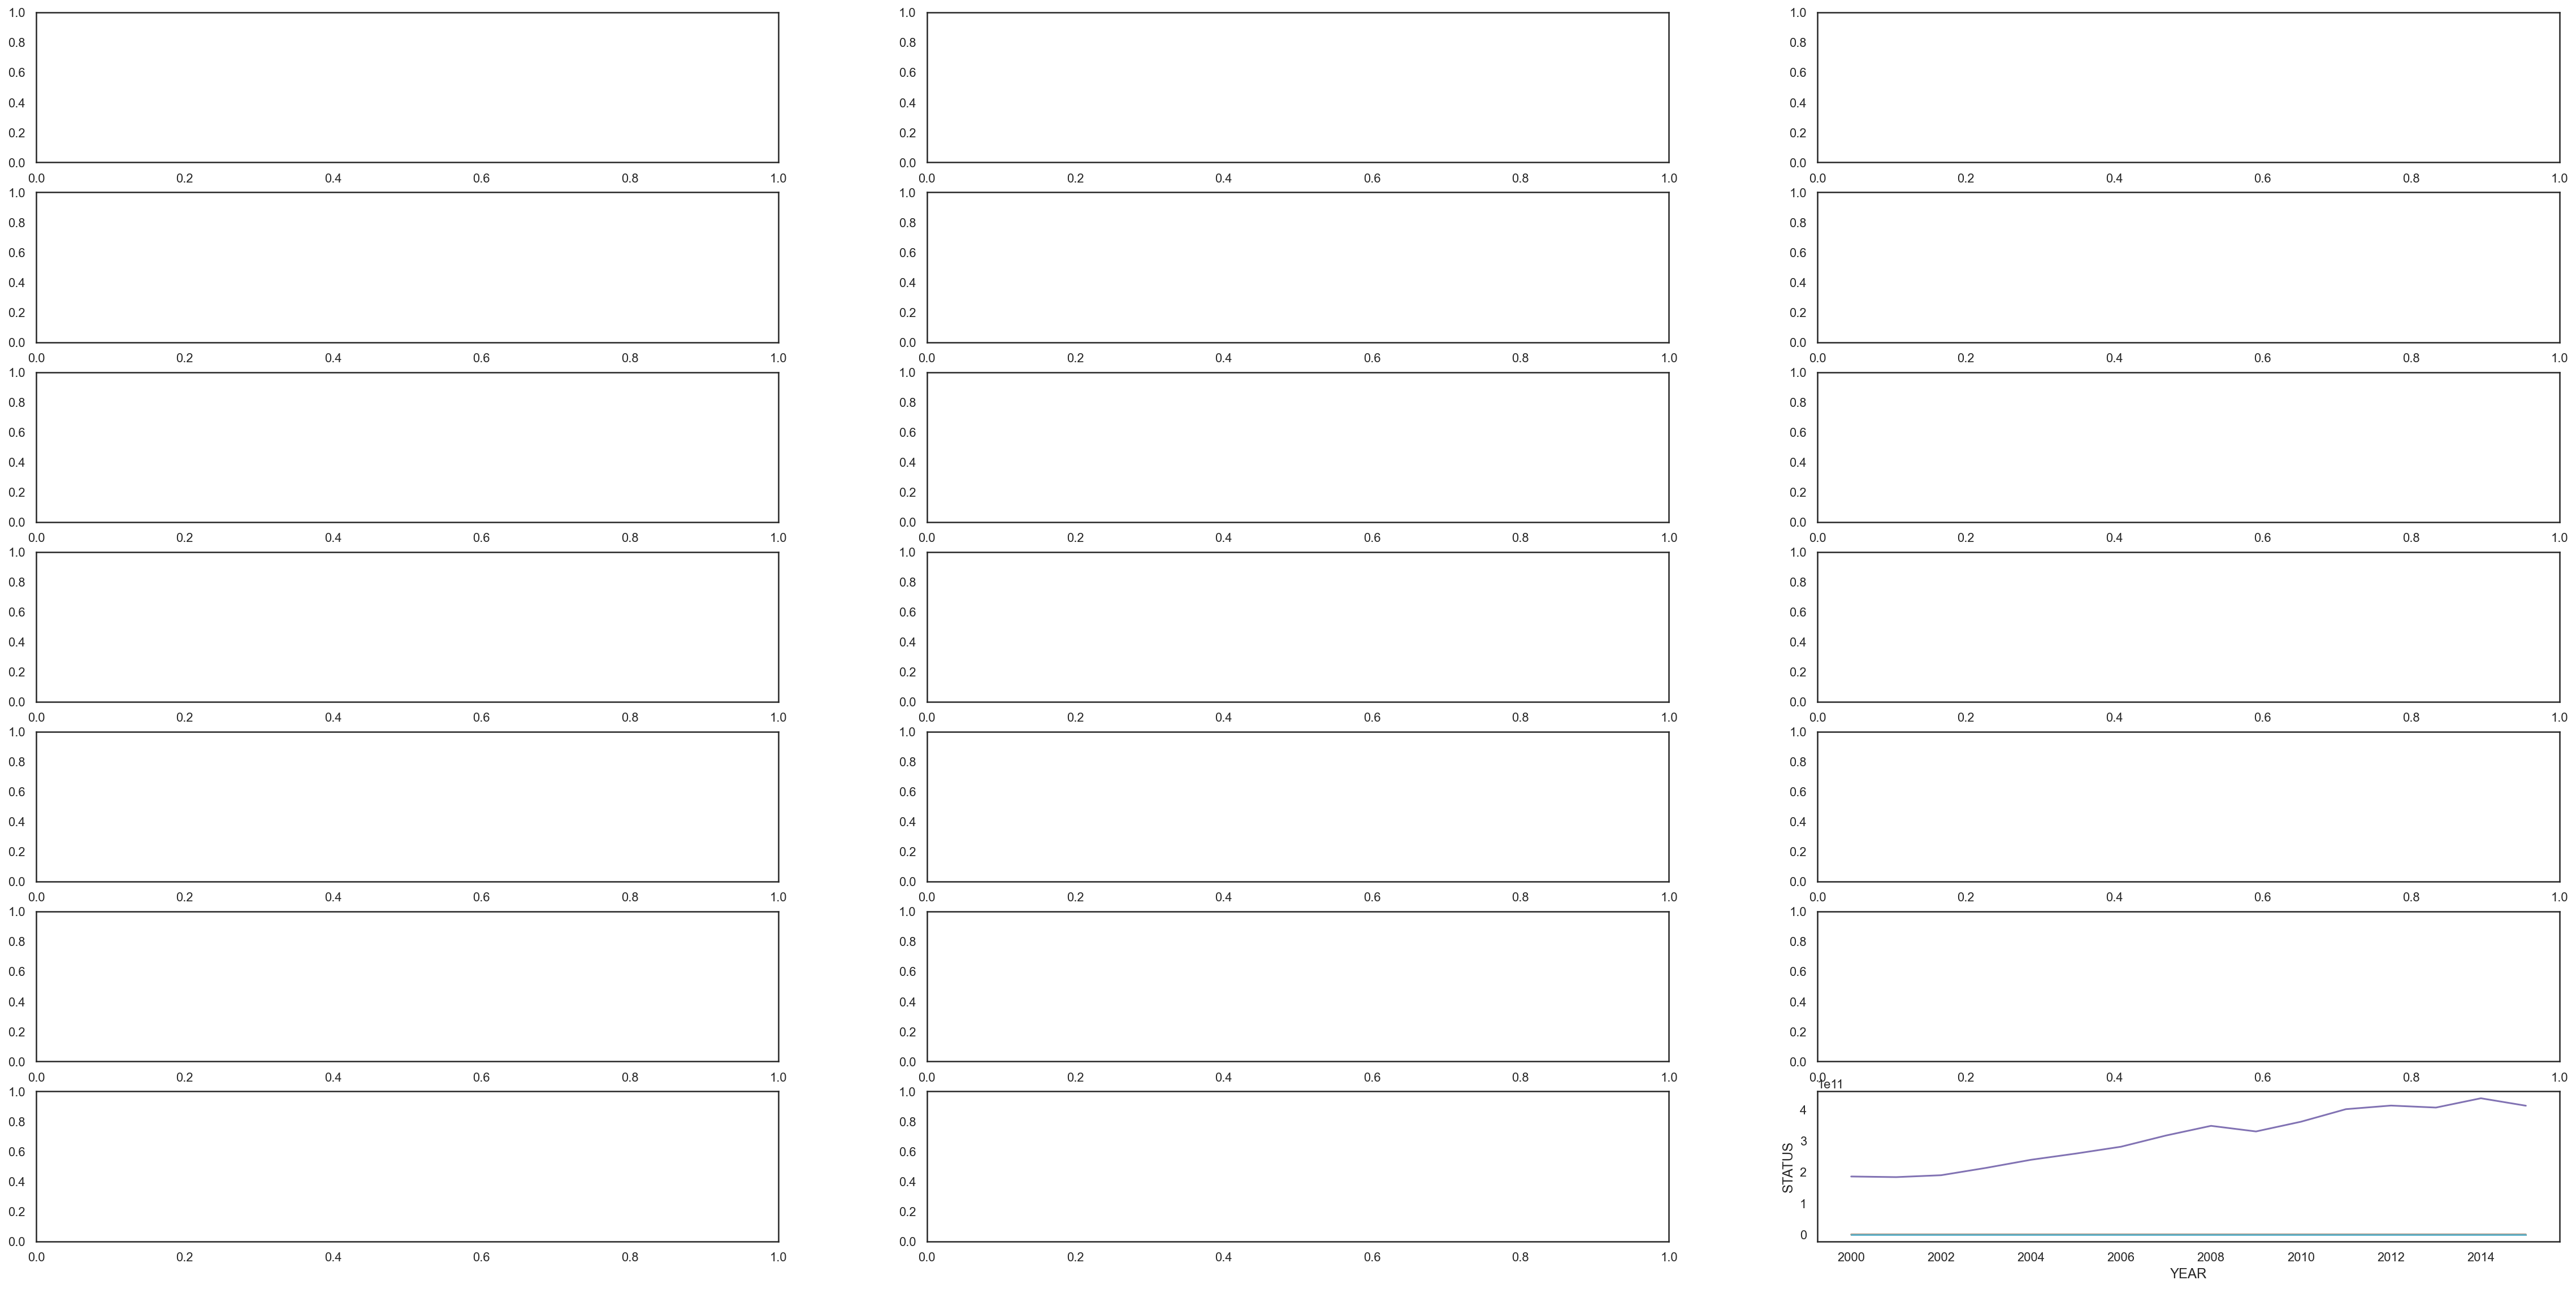

In [54]:
# subplot으로 다 나타내기가 계속 안되네요ㅠㅠ
# 위에 대분류별로 나눈 그래프로 우선 참조 부탁드려요
fig, ax = plt.subplots(7,3, figsize=(40,20))
for i in range(len(year_data.columns)):
    sns.lineplot(data=year_data[year_data.columns.tolist()[i]])

In [27]:
# region_income level data 불러오기
original2 = pd.read_csv("../datas/region_income.csv")
original2.head()

,CountryName,Status,CountryCode,ISO3166-1-numeric,Region,IncomeGroup
0,Afghanistan,Developing,AFG,4,South Asia,Low income
1,Albania,Developing,ALB,8,Europe & Central Asia,Upper middle income
2,Algeria,Developing,DZA,12,Middle East & North Africa,Lower middle income
3,Angola,Developing,AGO,24,Sub-Saharan Africa,Lower middle income
4,Antigua and Barbuda,Developing,ATG,28,Latin America & Caribbean,High income
